Support Vector Machine (SVM) untuk mencari boundary decision yang dapat memisahkan antar kelas dengan baik

Referensi: https://www.svm-tutorial.com/

## Konsep Dasar 

Sebuah kasus klasifikasi dimana terdapat dua buah class,class hitam dan putih.pada kasus ini juga terdapat dua buah features yaitu X1 dan X2.kita diminta untuk menarik suatu garis lurus atau garis linear yang dapat memisahkan kedua class tersebut.

##### *Dalam classification task pemisah atau pembatas antar kelas sering dikenal dengan istilah decision boundary*

Kita dihadapkan pada tiga pilihan garis linear yaitu H1(warna hijau),H2(warna biru),H3(warna merah).

Garis H1 tidak bisa digunakan sebagai garis pemisah antar dua class yang kita miliki.tersisa dua garis yang dapat memisahkan kedua kelas tersebut dengan sempurna.H3 adalah garis yang paling baik dalam memisahkan kedua class.karena H3 memiliki margin yang lebih besar bila dibandingkan dengan H2.

## Terminologi Dasar

### Decision Boundary (Hyperplane)

![title](img1.png)

Terminologi pertama yang akan kita bahas adalah Hyperplane,Hyperplane merupakan terminologi yang umum digunakan dalam SVM untuk menrepresentasikan decision boundary

Kita akan menggunakan kasus yang tadi telah kita pelajari.karena kasus tadi kita dihadapkan dengan dua features,maka kita memiliki plotting dua dimensi.decision boundary yang kita peroleh berupa suatu garis (pada kasus tersebut berupa garis lurus/linear)

Tetapi ketika kita hanya memiliki:
* Satu features maka decision boundary atau pemisah antar kelasnya berupa titik atau nilai threshold 
* Tiga features maka decision boundarynya berupa sebuah bidang data 
* Empat atau lebih features maka decision boundary berupa bidang multi dimensi / Hyperplane

Pada SVM untuk menyederhanakan istilah maka setiap decission boundary yang dihasilkan umumnya akan disebut Hyperplane

-Bagaimana sih SVM menentukan decision boundary yang lebih baik?Untuk mengerti lebih dalam,ayuk kita check dibawah ini-

### Maximum Margin

![title](img2.png)

Margin ditentukan berdasarkan jarak terdekat antara decision boundary dengan anggota dari kelas yang ingin dipisahkan.

Kasus tersebut terdapat terdapat dua buah class yaitu class biru dan hijau.Terdapat juga dua buah features yaitu X1 dan X2.Kita memiliki sebuah decision boundary berupa garis linear berwarna merah yang digunakan untuk memisahkan kedua class yang kita miliki.

Garis linear merah tersebut merupakan decision boundary yang memisahkan class biru dengan class hijau.Area yang diarsir dengan warna kuning itulah yang dinamakan dengan margin.Margin diperoleh berdasarkan jarak terdekat antara decision boundary dengan anggota dari kelas yang ingin dipisahkan dan setiap anggota kelas yang berperan untuk menentukan margin dikenal sebagai Support Vector.

Untuk kasus tersebut terdapat tiga point sebagai Support Vector.Support Vector ini merupakan anggota dari suatu class yang posisinya paling dekat dengan decision boundary.dalam menentukan decision boundary SVM akan memilih berdasarkan margin terbesar atau juga dikenal dengan istilah Maximum Margin

### Linearly Inseperable & Kernel Tricks

Adanya kasus dimana kelas yang ada,tidak bisa dipisahkan dengan memanfaatkan garis linear.Untuk pemahaman lebih lanjut kita akan melihat contoh kasus dibawah ini

Referensi: https://www.quora.com/What-is-the-kernel-trick

![title](img3.png)

Di kelas ini terdapat dua buah kelas yaitu kelas titik dan kelas x.terdapat juga dua buah features sehingga ketika dilakukan plotting,kita akan mendapatkan plotting dua dimensi.Pada kasus ini tidaklah memungkinkan bagi kita untuk menarik garis linear sebagai decision boundary.kondisi semacam ini juga dikenal dengan istilah "Linearly Inseperable".

Untuk mengatasi kondisi semacam ini svm akan menproyeksikan data yang ada ke higher dimension atau ke dimensi yang lebih tinggi artinya bila data sebelumnya berada dalam dua dimensi,maka svm akan memproyeksikannya ke tiga dimensi (seperti nampak di foto sebelah kanan di atas) itu merupakan hasil proyek tiga dimensi dari data sebelumnya yang berbentuk dua dimensi.

Bisa nampak disini setelah diproyeksikan ke dimensi yang lebih tinggi dimana kasus ini adalah tiga dimensi,kedua kelas ini bisa dipisahkan dengan lebih mudah yaitu dengan menerapkan decision boundary yang berbentuk bidang datar.Jadi kita bisa tempatkan suatu bidang datar yang akan berperan sebagai decision boundary yang memisahkan antara kelas x dengan kelas titik.

Upaya untuk memproyeksikan sekumpulan data ke dimensi yang lebih tinggi,tentunya juga akan berimbas pada kenaikan beban komputasi.untuk solve masalah ini svm menawarkan teknik yang sangat efisien yang dikenal dengan istilah "Kernel Tricks".svm sendiri menawarkan beberapa jenis kernel seperti polynomial,sigmoid,rbf(radial basis function).

## Dataset: The MNIST database of handwritten digits

Referensi: http://yann.lecun.com/exdb/mnist/

Walaupun dataset ini tidak disertakan sebagai sample dataset di scikit learn,tetapi kita bisa mendownloadnya dengan memanfaatkan module "fetch openml",karena dataset ini juga tersedia di repository openml.

-caranya download dan mengakses datanya seperti dibawah ini-

In [5]:
from sklearn.datasets import fetch_openml 

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

*Sewaktu kita mengeksekusi script ini,pastikan memilih koneksi internet.karena fetch openml ini akan melakukan proses download dataset melalui jaringan internet*

* 70000 gambar berbeda yang berisi tulisan tangan manusia yang cakup angka 0-9.dataset ini juga umum digunakan untuk melakukan perbandingan performa model machine learning dalam mengenali angka atau bilangan dari tulisan tangan manusia.

Ada salah seorang tokoh besar dalam bidang computer vision yang terlibat dalam pengelolaan dataset ini yaitu Yann LeCun.beliau memiliki kontribusi besar dalam bidang OCR atau Optical Character Recognition dan juga Handwritten Recognition.

##### *Karena sekarang dataset yang kita miliki berupa data image maka kita akan matplotlib untuk menampilkan datanya*

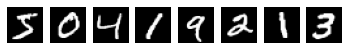

In [9]:
import matplotlib.pyplot as plt #import module
import matplotlib.cm as cm #CM = Color Map

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), #data reshape
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

Dari hasil tersebut bisa kita lihat,itu merupakan tulisan tangan manusia atau human handwritten yang menrepresentasikan bilangan atau angka

In [10]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

-Selanjutnya kita akan bagi dataset tersebut ke dalam training dan testing set dengan cara di bawah ini"

In [ ]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# X_train = X[:1000]
# y_train = y[:1000]
# X_test = X[69000:]
# y_test = y[69000:]

## Classification dengan SVC (Support Vector Classifier)

Kita akan menerapkan Support Vector Machine untuk melakukan angka klasifikasi angka numeric berdasarkan dataset tulisan tangan yang kita miliki

In [ ]:
from sklearn.svm import SVC #import module

model = SVC(random_state=0)
model.fit(X_train, y_train) #traning model

Setelah modelnya di traning,selanjutnya kita akan lakukan evaluasi performa dari model yang baru saja kita training,kita akan memanfaatkan classification_report.

In [ ]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test) #testing set
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning dengan GridSearchCV

Untuk tiap model machine learning terdapat sejumlah parameter yang bisa kita sesuaikan,dalam konteks machine learning parameter yang digunakan untuk mengatur proses training dari suatu model dikenal dengan istilah "Hyperparameter" dan proses untuk mencari komposisi nilai optimum dari hyperparameter ini dikenal dengan istilah "Hyperparameter Tuning atau Hyperparameter Optimization"

Referensi: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [ ]:
from sklearn.model_selection import GridSearchCV #import module 

parameters = { 
    'kernel': ['rbf', 'poly', 'sigmoid'], 
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
} #tiga parameter dengan memberikan nilai di tiap parameter tersebut

grid_search = GridSearchCV(estimator=SVC(random_state=0), 
                           param_grid=parameters,
                           n_jobs=6, #number of jobs:menjalankan proses secara paralel dari processor kita
                           verbose=1, #ketika proses berjalan,kita akan mendapatkan feedback yang cukup informatif
                           scoring='accuracy') #nilai pembanding

grid_search.fit(X_train, y_train)

Jika kita menggunakan verbose satu maka terdapat informasi cukup informatif selama script berjalan

Hasil terakhir dari proses tuning model dengan memanfaatkan grid search ini adalah suatu train model yang di training dengan menerapkan komposisi hyperparameter paling optimum dari sejumlah opsi parameter yang kita spesifikasikan sebelumnya

-Mendapatkan informasi terkait komposisi nilai parameter paling optimum dari hasil pencarian grid search dengan cara dibawah ini-

In [ ]:
print(f'Best Score: {grid_search.best_score_}') #score/akurasi terbaik

best_params = grid_search.best_estimator_.get_params() #nilai parameter terbaik
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Dari hasil tersebut kita mengetahui bahwa :
* Skor akurasi terbaik dari proses kriteria adalah 0,907
* Nilai parameter terbaik yang berhasil ditemukan adalah 
 * kernel : rbf
 * C : 10
 * gamma : scale

## Predict & Evaluate

Kita akan melakukan evaluasi performa dari model yang baru saja kita training tadi dengan cara sperti dibawah ini dengan memanfaatkan classification report dan prediksi dengan menggunakan objek grid search.

In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))